#### TAN SHU FEI 7020466

### CSCI 316 - A2 Individual Task 1- 23/02/2022
- Implement a Naïve Bayesian classifier to predict the age of abalone in Python from scratch.

## 1. Import Libaries

In [2]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
sns.set(style="whitegrid")

## 2. Import Abalone Dataset

In [3]:
# Column name of each header
colsName = ['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 
            'Shucked weight', 'Vescera weight', 'Shell weight', 
            'Rings']

# Read in data from .data file
adf = pd.read_csv('./abalone.data',sep=',',names=colsName)

# Display data
adf.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Vescera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [4]:
adf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Vescera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


## 3. Create a new column called 'Age'

Judging an abalone's age using the Rings column:
- less than 6 rings: < 7.5 years old = 'young'
- 6 to 13 rings: 7.5 to 14.5 years old = 'adult'
- more than 13 rings: > 14.5 years old = 'old'


In [6]:
# create a list of conditions
conditions = [
    (adf['Rings'] >= 1) & (adf['Rings'] <= 5), 
    (adf['Rings'] >= 6) & (adf['Rings'] <= 13),
    (adf['Rings'] >= 14) & (adf['Rings'] <= 30)]

# create a list of the values we want to assign for each condition
values = ['Young', 'Adult', 'Old']

# create column name and select condition + values
adf['Age'] = np.select(conditions, values)
    
# Display data
adf.head() # Age column added successfully

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Vescera weight,Shell weight,Rings,Age
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,Old
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,Adult
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,Adult
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,Adult
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,Adult


- Age column with 'Young' 'Adult & 'Old' successfully added to database

### Data in 'Age'

In [7]:
# Show the total number of each cover types in this dataframe
print(adf.groupby('Age').size())

Age
Adult    3498
Old       490
Young     189
dtype: int64


### Visualize 'Age'

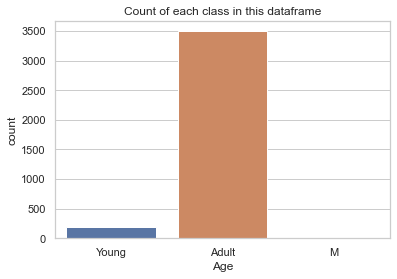

In [8]:
# visualize the count of each 'Cover_Type' in this dataframe
plt.title('Count of each class in this dataframe')
sns.set_style('whitegrid')
sns.countplot(x=adf['Age'], order= ['Young','Adult','M'])

plt.show()

- There's significantly more Adult abalones than the rest of the age

___

## 4. Encode Column 'Age' To dtype int64

In [9]:
# show the total number of each cover types in this dataframe
adf.groupby('Sex').size()

Sex
F    1307
I    1342
M    1528
dtype: int64

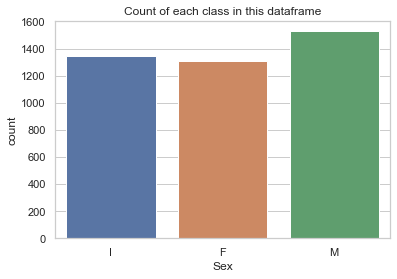

In [10]:
# visualize the count of each 'Cover_Type' in this dataframe
plt.title('Count of each class in this dataframe')
sns.set_style('whitegrid')
sns.countplot(x=adf['Sex'], order= ['I','F','M'])

plt.show()

- Amount of Males abalones is the highest at 1528
- Female & Infant abalones are almost the same amount

- Encode Sex column to int64 for easier processing

In [11]:
# Encode Sex column
encode_data = {"Sex":{"I":1, "F":2, "M":3}}
adf = adf.replace(encode_data)
adf

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Vescera weight,Shell weight,Rings,Age
0,3,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15,Old
1,3,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7,Adult
2,2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9,Adult
3,3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10,Adult
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7,Adult
...,...,...,...,...,...,...,...,...,...,...
4172,2,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11,Adult
4173,3,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10,Adult
4174,3,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9,Adult
4175,2,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10,Adult


In [12]:
adf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   int64  
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Vescera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
 9   Age             4177 non-null   object 
dtypes: float64(7), int64(2), object(1)
memory usage: 326.5+ KB


___

## 5. Check for NULL, empty or zero values in dataset

### Number of NULL in each dataset

In [9]:
# Check each columns for how many null data
print("Missing values for each column:\n")
print(adf.isnull().sum())

Missing values for each column:

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Vescera weight    0
Shell weight      0
Rings             0
Age               0
dtype: int64


### Number of non-zeros in each column

In [10]:
adf.astype(bool).sum(axis=0)

Sex               4177
Length            4177
Diameter          4177
Height            4175
Whole weight      4177
Shucked weight    4177
Vescera weight    4177
Shell weight      4177
Rings             4177
Age               4177
dtype: int64

- Column 'Height' contains 4175 / 4177 value.
- Hence there's 2 values that is zeros in the dataset.

### Replace zeros values in 'Height' cols to mean

In [11]:
adf['Height'] = adf['Height'].replace(0, adf['Height'].mean())

### All data have equal numer of dataset now

In [12]:
# Check again.
# Height is now int 4177
adf.astype(bool).sum(axis=0)

Sex               4177
Length            4177
Diameter          4177
Height            4177
Whole weight      4177
Shucked weight    4177
Vescera weight    4177
Shell weight      4177
Rings             4177
Age               4177
dtype: int64

In [13]:
adf.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Vescera weight,Shell weight,Rings,Age
0,3,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,Old
1,3,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,Adult
2,2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,Adult
3,3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,Adult
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,Adult


___

## 6. Randomize Dataset

In [14]:
# Set reset_index drop to True to prevent creating a new cols 
# with old index entries
adf = adf.sample(frac=1).reset_index(drop=True)
adf.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Vescera weight,Shell weight,Rings,Age
0,3,0.415,0.345,0.135,0.3865,0.128,0.070,0.148,13,Adult
1,2,0.530,0.425,0.130,0.7585,0.325,0.197,0.205,8,Adult
2,2,0.470,0.365,0.120,0.5820,0.290,0.092,0.146,8,Adult
3,2,0.560,0.455,0.125,0.9430,0.344,0.129,0.375,21,Old
4,2,0.680,0.570,0.205,1.8420,0.625,0.408,0.650,20,Old


___

## 7. Naives Bayes Classifier Function From Scratch

In [15]:
# Bayes Theorem form
# P(y|X) = P(X|y) * P(y) / P(X)

class NaiveBayesClassifier():
    #--------------------------------------  
    # Constructor
    def fit(self, features, target):
        self.classes = np.unique(target)
        self.count = len(self.classes)
        self.feature_nums = features.shape[1]
        self.rows = features.shape[0]
        self.calc_prior(features, target)
        self.calc_statistics(features, target)
    #--------------------------------------
    # Calculate mean, variance for each column & convert to numpy array
    def calc_statistics(self, features, target):
        self.mean = features.groupby(target).apply(np.mean).to_numpy()
        self.var = features.groupby(target).apply(np.var).to_numpy()  
        return self.mean, self.var
    #-------------------------------------- 
    # Density function of the normal distribution
    def gaussian_density(self, class_idx, x):     
        '''
        Calculate probability from gaussian density func.
        Assume probability of specific target & class is normally distributed 
        
        Probability density function:
        (1/√2pi*σ) * exp((-1/2)*((x-μ)^2)/(2*σ²)), 
        where μ=mean, σ²=variance, σ=sqrt of variance(SD)
        '''
        mean = self.mean[class_idx]
        var = self.var[class_idx]
        
        numerator = np.exp( (-1/2) * ((x - mean)**2) / (2 * var) )
        denominator = np.sqrt(2 * np.pi * var)
        prob = numerator / denominator
        
        return prob
    #-------------------------------------- 
    # Prior probability P(y)
    # Calculate prior probabilities
    def calc_prior(self, features, target):
        self.prior = (features.groupby(target).apply(lambda x:len(x)) / self.rows).to_numpy()
        return self.prior
     #--------------------------------------  
    # Calculate posterior probability for each class
    def calc_posterior(self, x):
        posteriors = []

        for i in range(self.count): # From i to 3
            # use log to make it more numerically stable
            prior = np.log(self.prior[i]) 
            # use log to make it more numerically stable
            conditional = np.sum(np.log(self.gaussian_density(i, x))) 
            posterior = prior + conditional
            posteriors.append(posterior)
            
        # return class with highest posterior probability
        return self.classes[np.argmax(posteriors)]
    #--------------------------------------
    # Calculate prediction
    def predict(self, features):
        preds = [self.calc_posterior(f) for f in features.to_numpy()]
        return preds
    #-------------------------------------- 
    # Calculate accuracy after getting prediction
    def accuracy(self, y_test, y_pred):
        accuracy = np.sum(y_test == y_pred) / len(y_test)
        return accuracy
    #-------------------------------------- 
    # Display data 
    def visualize(self, y_true, y_pred, target):
        
        fig, ax = plt.subplots(1, 2, figsize=(13,5))
        fig.suptitle('True vs Predicted Comparison\n\n', fontsize=20)
        
        tr = pd.DataFrame(data=y_true, columns=[target])
        pr = pd.DataFrame(data=y_pred, columns=[target])
        
        plot1=sns.countplot(x=target, data=tr, ax=ax[0], palette='coolwarm',alpha=0.7)
        plot2=sns.countplot(x=target, data=pr, ax=ax[1], palette='coolwarm',alpha=0.7)
        
        ax[0].tick_params(labelsize=12)
        ax[1].tick_params(labelsize=12)
        
        ax[0].set_title("True values", fontsize=18)
        ax[1].set_title("Predicted values", fontsize=18)
        
        ax[0].set_ylim([0,1100])
        ax[1].set_ylim([0,1100])
        
        plt.show()
    #-------------------------------------- 

___

## 8. Split Data Into 70% Training & 30% Test

In [16]:
# Set features and target
# X stores everything else except 'Age', Y stores 'Age'
X, y = adf.iloc[:, :-1], adf.iloc[:, -1]

# Randomize data
arr_rand = np.random.rand(X.shape[0]) # Random float
split = arr_rand < np.percentile(arr_rand, 70) # Returns bool

# Declare x & y training and testing set
X_train = X[split]
y_train = y[split]

X_test =  X[~split]
y_test = y[~split]

# Display int in train & test after split
print("X_train y_train: ",X_train.shape, y_train.shape)
print("X_test y_test: ", X_test.shape, y_test.shape)

X_train y_train:  (2924, 9) (2924,)
X_test y_test:  (1253, 9) (1253,)


In [17]:
# Build the Naives Bayes classifier object
x = NaiveBayesClassifier()

# Use naive bayes model to fit training data
x.fit(X_train, y_train)

# Generate predicted classes for test data
# Stores 'Young', 'Adult', 'Old' from test data
predictions = x.predict(X_test)

/Users/tanshufei/opt/anaconda3/envs/py36-test/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


___

## 9. Create a Dummy Classifier for Comparison (Optional)
- DummyClassifier makes predictions that ignore the input features.
- Makes predictions without trying to find patterns in the data.
- Looks at what label is most frequent in the training dataset and makes predictions based on that label.

In [18]:
# Import library
from sklearn.dummy import DummyClassifier

# Build a 'dummy' classifier for comparison
# Establish random_state for reproducibility
dummy = DummyClassifier(random_state=1) 
#dummy = DummyClassifier(strategy='stratified') 

# Fit with X_train y_train:  (2924, 9) (2924,)
dumb = dummy.fit(X_train, y_train)

# Perform classification on X_test
dumb_pred = dumb.predict(X_test)

# Return probability estimates for the X_test
dumb_pred_prob = dumb.predict_proba(X_test)

## 10. Naives Bayes Classifier VS Dummy Classifier Accuracy

In [19]:
# Compare the results from y_test and X_test
# Returns accuracy in percentage
print("Accuracy (Naives Bayes Classifier) : ", x.accuracy(y_test, predictions))
print("Accuracy %: ", "%.2f" % ((x.accuracy(y_test, predictions))  * 100), "%")
print()
print("Accuracy (Dummy Classifier): ",dumb.score(dumb_pred, y_test))
print("Accuracy %: ", "%.2f" % ((dumb.score(dumb_pred, y_test))  * 100), "%")

Accuracy (Naives Bayes Classifier) :  0.8411811652035116
Accuracy %:  84.12 %

Accuracy (Dummy Classifier):  0.839584996009577
Accuracy %:  83.96 %


### Side-By-Side Comparison

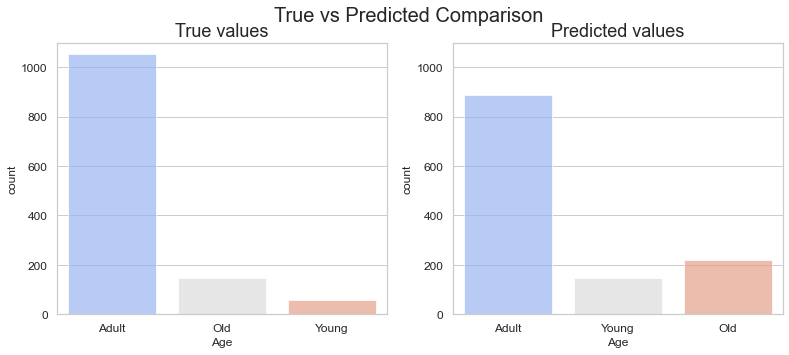

In [20]:
x.visualize(y_test, predictions, 'Age')

- The adult for true values is almost 150 more than the predicted values.
- The Old age for the predicted values is also almost approximately 35 more for the predicted values.
- The Young value varies the highest as the true values is approximately 75 and 175 for the Young in the predicted values.

### Naive Bayes Break-Down for Test Values

In [21]:
# Break down of y_test's 1253 data after split
print("Naive Bayes y_test Class Counts:")
print(y_test.value_counts(), end="\n\n")

print("Naive Bayes y_test Class Proportions:")
print(y_test.value_counts()/len(y_test))

Naive Bayes y_test Class Counts:
Adult    1052
Old       145
Young      56
Name: Age, dtype: int64

Naive Bayes y_test Class Proportions:
Adult    0.839585
Old      0.115722
Young    0.044693
Name: Age, dtype: float64


### Naive Bayes Break-Down for Train Values

In [22]:
# Break down of y_train's 2924 data after split
print("Naive Bayes y_Train Class Counts:")
print(y_train.value_counts(), end="\n\n")

print("Naive Bayes y_Train Class Proportions:")
print(y_train.value_counts(normalize=True), end="\n\n")

Naive Bayes y_Train Class Counts:
Adult    2446
Old       345
Young     133
Name: Age, dtype: int64

Naive Bayes y_Train Class Proportions:
Adult    0.836525
Old      0.117989
Young    0.045486
Name: Age, dtype: float64



___

## 11. Naives Bayes Classifier VS Dummy Classifier Confustion Matrix

### Dummy Classifier

In [23]:
# Import libraries
import sklearn
from sklearn.metrics import *

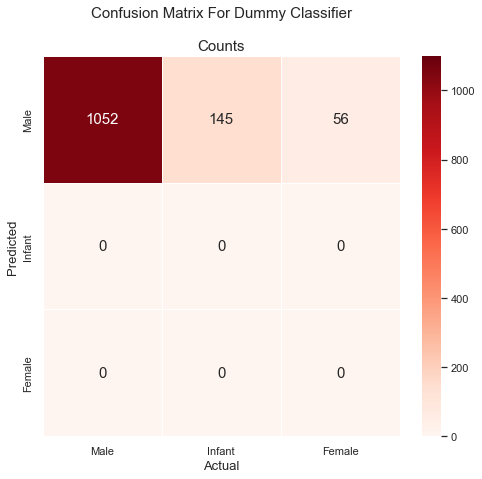

In [24]:
cm_dummy = confusion_matrix(y_test, dumb_pred)
cm_dummy_df = pd.DataFrame(cm_dummy)

fig,ax = plt.subplots(figsize=(8,7))
sns.heatmap(cm_dummy_df.T, annot=True, annot_kws={'size':15}, cmap='Reds',
           vmin=0, vmax=1100, fmt='.0f', linewidths=1,linecolor='white',cbar=True,
           xticklabels=['Male','Infant','Female'],yticklabels=['Male','Infant','Female'])
plt.ylabel('Predicted', fontsize=13)
plt.xlabel('Actual', fontsize=13)

ax.set_xticklabels(['Male','Infant','Female'], fontsize=11)
ax.set_yticklabels(['Male','Infant','Female'], fontsize=11)

plt.title('Confusion Matrix For Dummy Classifier\n\nCounts', fontsize=15)
plt.show()

- Large bulk of data is coming from Adult, mostly Males to be true-positive.
- Infants and Female is incorrectly identified

### Number of data in each category

In [25]:
y_train.value_counts(normalize=True)

Adult    0.836525
Old      0.117989
Young    0.045486
Name: Age, dtype: float64

- dummy classifier seems to be classifying the bulk of our data as Males.
- We have a lot more Adults as compared to Young and Old.
- So the dummy classifier is predicting more Adults, Males in general to Young & Old.

### Naive Bayes Classifier

In [26]:
import sklearn
from sklearn.metrics import *

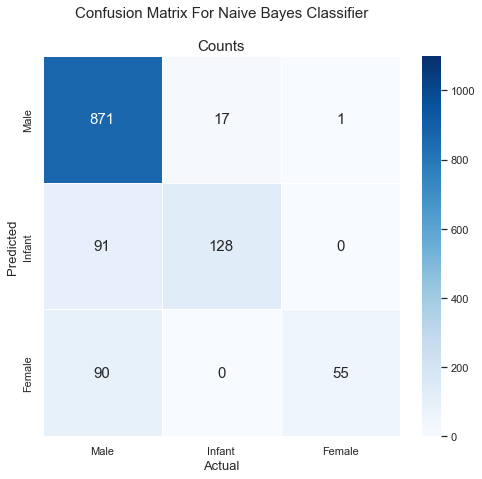

In [27]:
cm_naive = confusion_matrix(y_test, predictions)
cm_naive_df = pd.DataFrame(cm_naive)

fig,ax = plt.subplots(figsize=(8,7))
sns.heatmap(cm_naive_df.T, annot=True, annot_kws={'size':15}, cmap='Blues',
           vmin=0, vmax=1100, fmt='.0f', linewidths=1,linecolor='white',cbar=True,
           xticklabels=['Male','Infant','Female'],yticklabels=['Male','Infant','Female'])
plt.ylabel('Predicted', fontsize=13)
plt.xlabel('Actual', fontsize=13)

ax.set_xticklabels(['Male','Infant','Female'], fontsize=11)
ax.set_yticklabels(['Male','Infant','Female'], fontsize=11)

plt.title('Confusion Matrix For Naive Bayes Classifier\n\nCounts', fontsize=15)
plt.show()

- The confusion matrix model correctly predicted the Age of Males 848 times. (True-Negative) 
- There're most Adults than Infant and Females hence inbalance in figures from dataset
- Correctly predicted Ages of Infant 123 times.
- Correctly predicted Ages of Female 62 times. (True-Positive) 
- 220 data has been incorrectly identified.

### Comparison
- The dummy classifier performed better with 1031 data in the True-Positive, as compared to 848 in the Naive Bayes Classifier.
- But Naive Bayes Classifier correctly predicted 123 Infants and 62 Females as compared to 0 on both using the Dummy Classifier.

___